# Ainhoa´s Individual Airports Project 

In this project, we will delve into a comprehensive exploration of a transport links dataset using pandas within Python. This dataset includes details about various modes of transportation such as airports, train stations, and ferry terminals. A database from the web OpenFlights: Airport and airline data will be used.


In [29]:
# Firstly, we must import necessary libraries
import pandas as pd # Import Pandas library for data handling
import requests # Import Request library for making HTTP request when loading data set directly from URL
# 1. Loading of the dataset as a dataframe.
# Define the header
header = ["AirportID", "Name", "City", "Country", "IATA", "OACI",  "Latitude",  "Longitude", "Altitude",  \
          "Timezone",  "DST",  "Tz",  "Type", "Source"]
# Load the dataset directly from the URL
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat"
response = requests.get(url)  # Perform an HTTP GET request to retrieve data from the URL
with open('dataset.csv', 'wb') as file:  # Open a file 
    file.write(response.content)  # Write the content of the response to the file
data = pd.read_csv('dataset.csv', names=header) # Read the CSV file into a Pandas DataFrame
# 2. Show the first 10 rows of the DataFrame
print("First 10 rows of the dataframe:")
print(data.head(10))
# 3. Statistical summary
print("\nStatistical summary:")
summary_before = data.describe()
print(summary_before) # count (shows the total number of values in each column), mean (represents the average of the values in each column), std (indicates the standard deviation, a measure of the dispersion of values around the mean), min (displays the minimum value in each column), 25% (represents the 25th percentile), 50% (signifies the 50th percentile or the median), 75% (reflects the 75th percentile) and max (shows the maximum values in each column)

First 10 rows of the dataframe:
   AirportID                                         Name          City  \
0          1                               Goroka Airport        Goroka   
1          2                               Madang Airport        Madang   
2          3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3          4                               Nadzab Airport        Nadzab   
4          5  Port Moresby Jacksons International Airport  Port Moresby   
5          6                  Wewak International Airport         Wewak   
6          7                           Narsarsuaq Airport  Narssarssuaq   
7          8                      Godthaab / Nuuk Airport      Godthaab   
8          9                        Kangerlussuaq Airport   Sondrestrom   
9         10                               Thule Air Base         Thule   

            Country IATA  OACI   Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA  -6.081690  145.391998      528

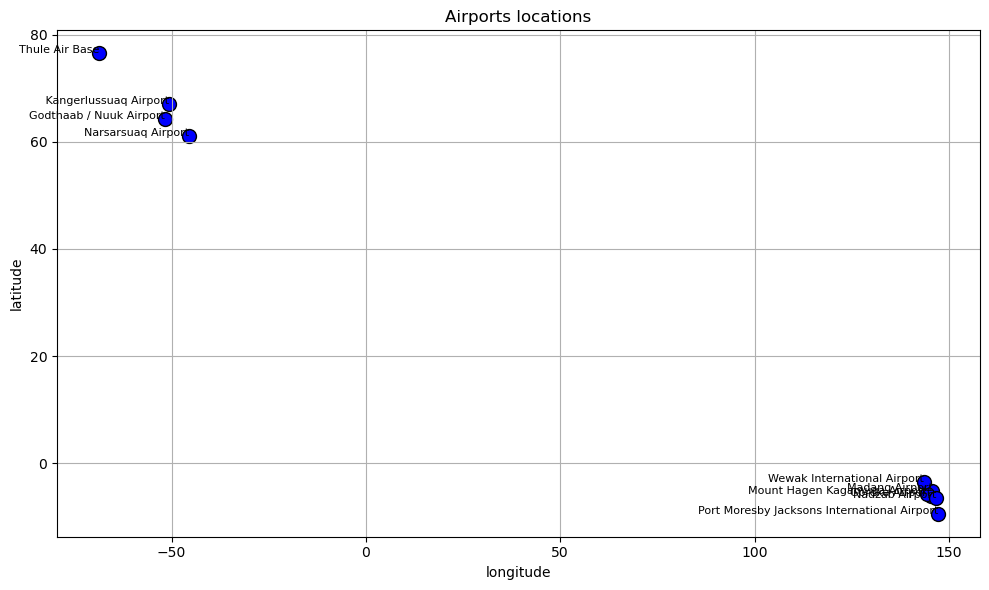

In [30]:
# Scatter plot with latitude and longitude variables with decimal numbers as statistical summary
import matplotlib.pyplot as plt # Import matplotlib library to create the scatter plot
# Defining latitude (lats) and longitude (lons) coordinate data
lats = [-6.081690, -5.207080, -5.826790, -6.569803, -9.443380, -3.583830, 61.160500, 64.190903,  67.012222, 76.531197]
lons = [145.391998, 145.789001, 144.296005, 146.725977, 147.220001, 143.669006, -45.425999, -51.678101, -50.711603, -68.703201]
# create a list which contains names of the aierports corresponding to the coordinates
airport_names = ["Goroka Airport", "Madang Airport", "Mount Hagen Kagamuga Airport", "Nadzab Airport", "Port Moresby Jacksons International Airport", "Wewak International Airport", "Narsarsuaq Airport", "Godthaab / Nuuk Airport", " Kangerlussuaq Airport", "Thule Air Base"]
# Creating the scatter plot. To do this, we define, the dimensions of the figure and some visual properties
plt.figure(figsize = (10, 6))
plt.scatter(lons, lats, marker="o", c="blue", edgecolor="black", s=100)
# Legend: labeling points with airport names, and, adding labels and title
for i, name in enumerate(airport_names):
    plt.text(lons[i], lats[i], name, fontsize=8, ha="right")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Airports locations")
# Displaying the plot, with a grid and adjusts the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot commentary: in this plot, the points are very close to the imaginary straight downward line. This means that there is a strong negative correlation between two variables (close to the value -1); in our selection, the higher the longitude value, the lower the latitude value. In addition, the clustering of points coincides with the location of airports, either in America or in the Pacific.

In [31]:
# 4. Remove the "AirportID", "Latitude", "Longitude" and "Altitude" columns for the next analysis
columns_to_drop = ["AirportID", "Latitude", "Longitude", "Altitude"]
data = data.drop(columns=columns_to_drop, axis=1, errors="ignore") 
print(data)

                                              Name          City  \
0                                   Goroka Airport        Goroka   
1                                   Madang Airport        Madang   
2                     Mount Hagen Kagamuga Airport   Mount Hagen   
3                                   Nadzab Airport        Nadzab   
4      Port Moresby Jacksons International Airport  Port Moresby   
...                                            ...           ...   
12663                        Ulan-Ude East Airport      Ulan Ude   
12664                         Krechevitsy Air Base      Novgorod   
12665                  Desierto de Atacama Airport       Copiapo   
12666                           Melitopol Air Base     Melitopol   
12667                    Lincoln Train Station LNK       Lincoln   

                Country IATA  OACI Timezone DST                    Tz  \
0      Papua New Guinea  GKA  AYGA       10   U  Pacific/Port_Moresby   
1      Papua New Guinea  MAG  AYMD   

In [32]:
# 5. Statistical summary again
print("\nStatistical summary after removing specified columns:")
summary_after = data.describe()
print(summary_after)


Statistical summary after removing specified columns:
             Name      City        Country   IATA   OACI Timezone    DST  \
count       12668     12619          12668  12668  12667    12668  12668   
unique      12330      9673            241   6925   8161       42      8   
top     North Sea  New York  United States     \N     \N        1      E   
freq           21        50           2708   5744   4507     2706   3478   

           Tz     Type       Source  
count   12668    12668        12668  
unique    312        5            4  
top        \N  airport  OurAirports  
freq     4282     8264         7698  


#### Commentary to the statistical summary: the summary statistic changes by removing the numeric columns such as latitude or longitude. So count (indicates the number of non-null values in each column), unique (shows the number of unique values in each column), top (represents the most frequent value in each column), and freq (displays the frequency of the value in each column), are specific for categorical or object-type data. In addition, null values appear.

In [33]:
# 6. For determine the proportion of value "\N" in the "Tz" column with the value_counts method
Tz_proportion = data['Tz'].value_counts(normalize=True).get("\\N", 0)
print(f"\nProportion of '\\N' values in the 'Tz' column: {Tz_proportion:.2%}")


Proportion of '\N' values in the 'Tz' column: 33.80%


In [34]:
# 7. Reload the dataset so that null values are correctly interpreted and repeat section 4, delete columns
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat"
response = requests.get(url)  
with open('dataset.csv', 'wb') as file:  
    file.write(response.content)
# Reload the dataset into a Pandas DataFrame with the correct header and handle null values
data = pd.read_csv('dataset.csv', names=header, na_values=["\\N"])
# Section 4: remove the "AirportID", "Latitude", "Longitude" and "Altitude" columns for the next analysis
columns_to_drop = ["AirportID", "Latitude", "Longitude", "Altitude"]
data = data.drop(columns=columns_to_drop, axis=1)
# Display the DataFrame
print(data)

                                              Name          City  \
0                                   Goroka Airport        Goroka   
1                                   Madang Airport        Madang   
2                     Mount Hagen Kagamuga Airport   Mount Hagen   
3                                   Nadzab Airport        Nadzab   
4      Port Moresby Jacksons International Airport  Port Moresby   
...                                            ...           ...   
12663                        Ulan-Ude East Airport      Ulan Ude   
12664                         Krechevitsy Air Base      Novgorod   
12665                  Desierto de Atacama Airport       Copiapo   
12666                           Melitopol Air Base     Melitopol   
12667                    Lincoln Train Station LNK       Lincoln   

                Country IATA  OACI  Timezone  DST                    Tz  \
0      Papua New Guinea  GKA  AYGA      10.0    U  Pacific/Port_Moresby   
1      Papua New Guinea  MAG  AYM

In [35]:
# 8. Check the entire dataframe for null values
null_values = data.isnull().sum()
# Display the count of null values for each column
print("\nCount of null values in each column:")
print(null_values)


Count of null values in each column:
Name           0
City          49
Country        0
IATA        5744
OACI        4508
Timezone     353
DST          353
Tz          4282
Type        1651
Source      1651
dtype: int64


In [36]:
# 9. Overwrite the null values of the IATA and OACI columns with the string 'UNKNOWN'
import numpy as np # for numerical operations and NaN representation
# Replace '\N' with NaN to later use "fillna"
data.replace(r'\N', np.nan, inplace=True)
# Replace null values in the 'IATA' column with 'UNKNOWN'
data['IATA'].fillna('UNKNOWN', inplace=True)
# Replace null values in the 'OACI' column with 'UNKNOWN'
data['OACI'].fillna('UNKNOWN', inplace=True)
# Display the updated DataFrame
print("\nDataFrame after replacing null values:")
data


DataFrame after replacing null values:


,Name,City,Country,IATA,OACI,Timezone,DST,Tz,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...
12663,Ulan-Ude East Airport,Ulan Ude,Russia,UNKNOWN,XIUW,NaN,NaN,NaN,airport,OurAirports
12664,Krechevitsy Air Base,Novgorod,Russia,UNKNOWN,ULLK,NaN,NaN,NaN,airport,OurAirports
12665,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,NaN,NaN,NaN,airport,OurAirports
12666,Melitopol Air Base,Melitopol,Ukraine,UNKNOWN,UKDM,NaN,NaN,NaN,airport,OurAirports


In [37]:
# 10. Change the type of the DST and Tz variables to categorical
# Convert 'DST' and 'Tz' column to categorical
data[["DST", "Tz"]] = data[["DST", "Tz"]].astype('category')
# Display the updated DataFrame
print("\nDataFrame after changing column types to categorical:")
print(data)
# Check the data types of columns
print("\nData types after changing column types:")
print(data.dtypes)


DataFrame after changing column types to categorical:
                                              Name          City  \
0                                   Goroka Airport        Goroka   
1                                   Madang Airport        Madang   
2                     Mount Hagen Kagamuga Airport   Mount Hagen   
3                                   Nadzab Airport        Nadzab   
4      Port Moresby Jacksons International Airport  Port Moresby   
...                                            ...           ...   
12663                        Ulan-Ude East Airport      Ulan Ude   
12664                         Krechevitsy Air Base      Novgorod   
12665                  Desierto de Atacama Airport       Copiapo   
12666                           Melitopol Air Base     Melitopol   
12667                    Lincoln Train Station LNK       Lincoln   

                Country     IATA     OACI  Timezone  DST  \
0      Papua New Guinea      GKA     AYGA      10.0    U   
1      P


Airport Type Counts:
Type
airport    8264
station    1332
unknown    1320
port        101
Name: count, dtype: int64


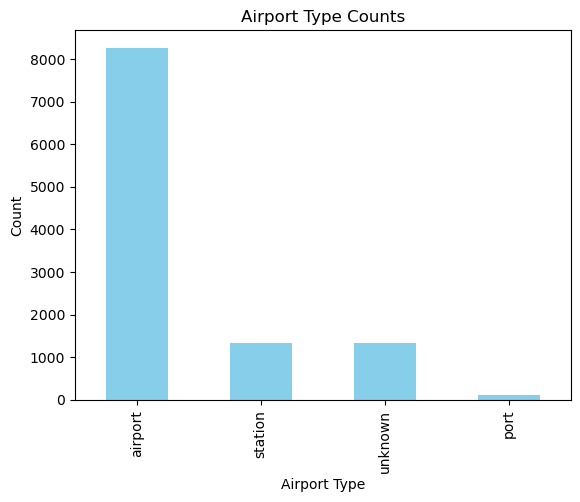

In [38]:
# 12. Group the data frame by airport type, showing the type count. Consider the best way to communicate the results; a plot might be helpful.
import matplotlib.pyplot as plt # for visualizations
type_counts = data['Type'].value_counts()
# Display the type counts
print("\nAirport Type Counts:")
print(type_counts)
# Plot the type counts
type_counts.plot(kind='bar', color='skyblue')
plt.title('Airport Type Counts')
plt.xlabel('Airport Type')
plt.ylabel('Count')
plt.show()

In [39]:
# 13. Select the names of cities where the airport type is "port," ensuring no repeated entries. How many cities have at least one port?
# Get unique city names for airports of type "port"
port_cities = data[data['Type'] == 'port']['City'].unique()
# Calculate the number of cities with at least one "port" airport
num_cities_with_port = len(port_cities)
# Display the unique city names and the count of cities with at least one "port" airport
print("Unique cities with at least one 'port' airport:", port_cities)
print("\nNumber of cities with at least one 'port' airport:", num_cities_with_port)

Unique cities with at least one 'port' airport: ['Macau' 'Stockholm' 'Helsingborg' 'Helsinki' 'Sakaiminato' 'Hong Kong'
 'Calais' 'Dover' 'Cape May NJ' 'Lewes DE' 'Bar Harbor ME' 'Yarmouth NS'
 'St. Ignace MI' 'Shenzhen' 'Zhuhai' 'Miyajima' 'Brown Bluff'
 'Devil Island' 'Gourdin Island' 'Cuverville Island' 'Labadee' 'Whittier'
 'Nuernberg' 'Costa maya' 'Rodby' 'Stranraer' 'Dieppe' 'Newhaven'
 'Falmouth' 'Cozumel' 'Philipsburg' 'Basseterre' 'Charlotte Amalie'
 'San Juan' 'Mormugao' 'Cochin' 'Salem' 'Severobajkalsk' 'Kendall'
 "St. George's" 'Cruz Bay' 'Red Hook' 'Anacortes' 'Friday Harbor' 'Valdez'
 'Bainbridge Island' 'Algerciras' 'Milan' 'Port Jefferson' 'Bridgeport'
 'Turin' 'Stykkisholmur' 'Kotor' 'Key West' 'Tau' 'Stavanger' 'Halhjem'
 'Sandviksvag' 'Arsvagen' 'Mortavika' 'Verona' 'Cheboygan'
 'Bois Blanc Island' 'St Ignace ' 'Toulon' 'Harpers Ferry' 'Auckland'
 'Bridgetown' 'Orient' 'Holyhead' 'Singapore' 'Batam' 'Kowloon'
 'Horseshoe Bay' 'Prince Rupert' 'Port Hardy' 'Nanaimo' 'S

### commentary: 11 cities have more than one port.

In [40]:
# 14. Show all rows for the fields: name of the airport, name of the country, and name of the city for airports located in Spain.
spain_airports = data[data['Country'] == 'Spain'][['Name', 'Country', 'City']]
# Display the DataFrame with selected fields for Spain airports
print("Airports in Spain:")
print(spain_airports)

Airports in Spain:
                                         Name Country                    City
1030                    Fuerteventura Airport   Spain           Fuerteventura
1031                           Hierro Airport   Spain                  Hierro
1032                         La Palma Airport   Spain  Santa Cruz De La Palma
1033                     Gran Canaria Airport   Spain            Gran Canaria
1034                        Lanzarote Airport   Spain                Arrecife
...                                       ...     ...                     ...
11437                     Madrid Estacion Sur   Spain                  Madrid
11438                     Granada Bus Station   Spain                 Granada
11879       Palma de Mallorca Cruise Terminal   Spain       Palma de Mallorca
12234                      Algeciras Heliport   Spain               Algeciras
12386  Región de Murcia International Airport   Spain                  Murcia

[145 rows x 3 columns]


In [19]:
# 15. Show the names of the countries and airports belonging to the cities of Madrid and Barcelona. Are all the records from Spain?
madrid_barcelona_airports = data[data['City'].isin(['Madrid', 'Barcelona'])][['Country', 'Name']]
# Display the DataFrame with selected fields for Madrid and Barcelona airports
print("Airports in Madrid and Barcelona:")
print(madrid_barcelona_airports)

Airports in Madrid and Barcelona:
         Country                                               Name
1188       Spain                    Barcelona International Airport
1194       Spain                                    Getafe Air Base
1198       Spain               Adolfo Suárez Madrid–Barajas Airport
1214       Spain                                   Torrejón Airport
1217       Spain                                     Cuatro Vientos
2690   Venezuela  General José Antonio Anzoategui International ...
6302       Spain                          Barcelona Cruise Terminal
8046       Spain                                             Atocha
8053       Spain                                  Chamartin Station
8055       Spain                                           Aeroport
8056       Spain                                  Passeig de Gracia
8057       Spain                                              Sants
8846       Spain                                    Barajas Station
9156       Spa

### commentary: All records are not from Spain. The country of Venezuela appears as it has a city called "Barcelona".

In [20]:
# 16. Save the previous results in a .csv file named Madrid_Barcelona.csv.
# Save the results to a CSV file
madrid_barcelona_airports.to_csv('Madrid_Barcelona.csv', index=False)
# Display a message indicating successful saving
print("Results saved to Madrid_Barcelona.csv")

Results saved to Madrid_Barcelona.csv


In [21]:
# To display the contents of the CSV file in my Jupyter Notebook 
# Read the CSV file into a DataFrame
result_df = pd.read_csv('Madrid_Barcelona.csv')
# Display the DataFrame
print("\nContents of Madrid_Barcelona.csv:")
print(result_df)


Contents of Madrid_Barcelona.csv:
      Country                                               Name
0       Spain                    Barcelona International Airport
1       Spain                                    Getafe Air Base
2       Spain               Adolfo Suárez Madrid–Barajas Airport
3       Spain                                   Torrejón Airport
4       Spain                                     Cuatro Vientos
5   Venezuela  General José Antonio Anzoategui International ...
6       Spain                          Barcelona Cruise Terminal
7       Spain                                             Atocha
8       Spain                                  Chamartin Station
9       Spain                                           Aeroport
10      Spain                                  Passeig de Gracia
11      Spain                                              Sants
12      Spain                                    Barajas Station
13      Spain                         Aeropuerto T4 Mad

## That´s all!